## The Tips Data Set
## Fundamentals of Data Analysis Assessment

This notebook begins with a description of the tips data set obtained using summary statistics. There follows a section on regression to investigate if there is a relationship between the total bill and the tip amount. Finally, relationships between variables within the data set are teased out and investigated further. Findings from each part of the analysis are summarized in the README file.

***
## Preliminaries
Load the various packages required to complete the work and set up the matplotlib plotting environment.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

***
## Description of the tips data set using summary statistics 

Load the data set to a dataframe and take a quick look at it by printing the first five lines.

In [2]:
# Load the data set.
tips = sns.load_dataset("tips")
# Size?
shape = tips.shape
print("Data frame shape", shape, "r,c")
# Print the first five lines.
tips.head()

Data frame shape (244, 7) r,c


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The rows of the data set contain **244** observations of the total bill and tip left in a resaurant, along with information about party size, day of the week, time of day, gender of the tipper, and whether or not they are a smoker. Three columns contain numeric data with class labels *total_bill*, *tip*, and *size*. The remaining four columns contain categorical data (divided into discrete groups) with class labels *sex*, *smoker*, *day*, and *time*. 

In [3]:
# Look at some quick descriptive statistics of the numeric data.
print(tips.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


Although this is useful, when we think of tips we usually imagine a percentage of the bill. I would say that the most important information contained in the data set is the tip as a fraction of the total bill. For this I will assume that the total_bill is the bill before the tip has been added in. 

In [4]:
# Make an empty data frame to hold tip as fraction of total bill.
ftip = pd.DataFrame(columns=['ftip'])
ftip['ftip'] = tips['tip']/tips['total_bill']

# Attach it to tips dataframe I think so can use groupby etc, work with df from now on.
df = pd.concat([ftip, tips], axis=1)

print(df.head( ))

# Get descriptive statistics for all columns, not just the numeric ones.
df.describe(include="all")

       ftip  total_bill   tip     sex smoker  day    time  size
0  0.059447       16.99  1.01  Female     No  Sun  Dinner     2
1  0.160542       10.34  1.66    Male     No  Sun  Dinner     3
2  0.166587       21.01  3.50    Male     No  Sun  Dinner     3
3  0.139780       23.68  3.31    Male     No  Sun  Dinner     2
4  0.146808       24.59  3.61  Female     No  Sun  Dinner     4


,ftip,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,NaN,157,151,87,176,NaN
mean,0.160803,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,0.061072,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,0.035638,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,0.129127,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,0.154770,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,0.191475,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


- It looks as if the average tip is about 17% of the total bill, although some very generous diner tipped 70% and a stingy one left only 3%.
- Two unique values of sex, which we know to be Male and Female. Of the 244 observations, 157 concern males.
- Two unique values of smoker, which we know to be Yes or No. Of the 244 observations, 151 concern smokers.
- Four unique values of day, Saturday being the most frequent with 87 of the 244 observations.
- Two unique values of time, with most meals being dinner: 176 of the total.
- Party size varied from 1 to 6.

In [5]:
# What are the days and dining times contained in the data set?
print("Dining times are: ", df.time.unique())
print("Days are: ", df.day.unique())

Dining times are:  [Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]
Days are:  [Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]


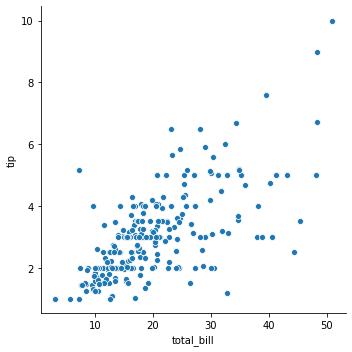

In [6]:
# Look at tip as a function of total_bill.
sns.relplot(x="total_bill", y="tip", data=df)

It looks as if the tip increases with total_bill. We'll be looking at this in more detail in the section on regression. For now, we'll plot the tip as a fraction of the total bill. This should be roughly a constant with some spread reflecting the range of straight lines that could be drawn through the data in the plot above.

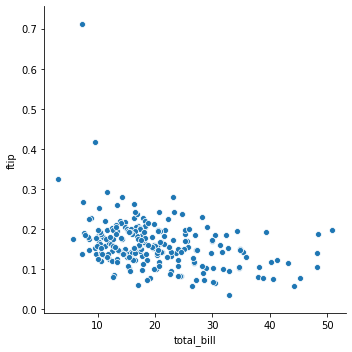

In [7]:
# Tip as a fraction of the total_bill.
sns.relplot(x="total_bill", y="ftip", data=df)

I will now look at how some of the other variables affect tip size. I prefer not to put too much information on one plot, although Seaborn allows for very complicated visualizations.

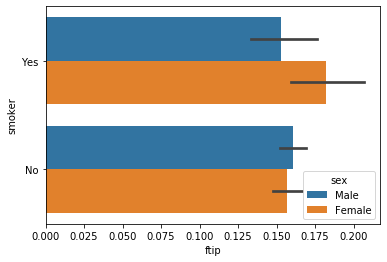

In [8]:
# Plot the fractional tip for smokers/non-smokers and male/female.
sns.barplot(x= 'ftip', y= 'smoker', hue='sex', data = df)

Looks like male and female non-smokers leave very similar fractional tips. However, female smokers leave larger tips than male smokers.

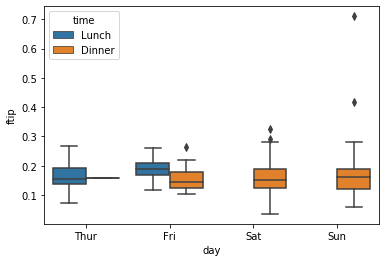

In [9]:
# How does the time affect the fractional tip?
sns.boxplot(x="day", y="ftip", hue="time", data=df)

From the above plot we see that data from only dinner is recorded on saturday and Sunday, both lunch and dinner are recorded on Fridays, and there seems to be maybe one observation relating to dinner on Thursday. We will look at how the variables are intertwined later on in the notebook.

***
## Regression

In this part of the notebook we ask the question: is there a relationship between the total bill and tip amount?

***
## Relationships between variables

In the section on regression above, we investigated if the tip amount is related to the total bill. We found that it was. We can also ask other questions of the data. Do smokers tip more than non-smokers? Do men tip less than women? Are diners more likely to leave a large tip if they eat in the evening as part of a large group, rather than at lunch with a single friend? Does the day of the week matter at all? We will address some questions like these in the section.